# ÍNDICE
- 1. Linear Regression
- 2. Linear Regression Using Batch Gradient Descent
- 3. Polynomial Regression
- 4. Regularized Linear Models
     + Ridge Regression
     + Lasso Regression

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")




# Linear regression


Generamos el dataset, que es de la forma:
    $y = 4+3x_{1}+RuidoGaussiano(0,1)$
    
Es decir, una variable uniforme con un ruido Gaussiano de media 4

In [2]:
X = 2 *np.random.rand(100,1) #Distribución uniforme con 100 valores
y = 4 + 3 * X + np.random.randn(100, 1) #Distribución normal con 100 valores, media 0 y desviación 1

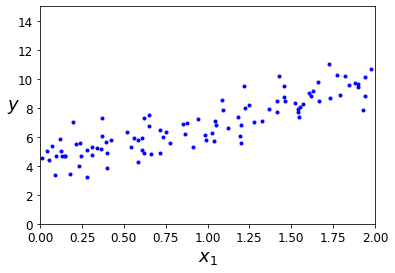

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]) #axis([xmin, xmax, ymin, ymax])
plt.show()


Aplicando el modelo lineal, tenemos que hallar los parámetros que en este caso son w0 y w1:
$$y_{i}=w_{0}+w_{1}\cdot x_{i1}$$ 
con:
$$w_{LS}= (X^{T} X)^{-1}X^{T}y$$
siendo:
$$X = \begin{bmatrix}
 1& x_{11} \\ 
 1& x_{21}\\ 
 ...& ...\\ 
 1& x_{100\, 1}
\end{bmatrix}$$

$$y=X\cdot w$$

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #Hallamos wls

In [5]:
theta_best # Esperaríamos que fuera 4 y 3 (porque sabemos como se ha generado, pero se supone que no lo sabemos)

array([[4.21509616],
       [2.77011339]])

Ahora hacemos predicciones de dos puntos para sacar la recta

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

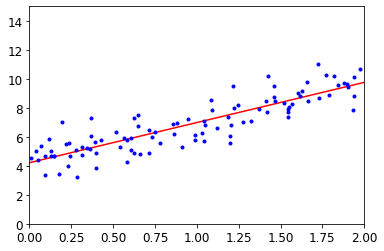

In [7]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Ahora lo hacemos con scikit learn

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Linear regression using batch gradient descent

Seguimos haciendo regresión lineal, pero para encontrar el mínimo de la función objetivo usamos gradient descent en vez de las expresiones en close form. Eso tiene ventajas para cuando hay un número grande de features (número de variables de entrada)

In [10]:
#Yet to be implemented

# Regresión Polinomial

Generamos el dataset, que es de la forma:
    $y = 0.5x_{1}^{2} + 2x_{1} + RuidoGaussiano(0,1)$
    


In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

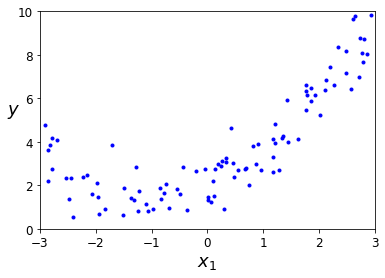

In [12]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Aplicando el modelo de regresión polinomial (para una dimensión):
$$y_{i}=w_{0}+w_{1}\cdot x_{i1}+w_{2}\cdot x_{i1}^{2}$$ 
con:
$$w_{LS}= (X^{T} X)^{-1}X^{T}y$$
siendo:
$$X = \begin{bmatrix}
 1 & x_{11} & x_{11}^{2} \\ 
 1 & x_{21} & x_{21}^{2} \\ 
 ... & ... & ...\\ 
 1 & x_{100\, 1} &  x_{100\, 1}^{2}
\end{bmatrix}$$

$$y=X\cdot w$$

In [13]:
X[0], X[1]

(array([1.76886782]), array([0.01582256]))

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True) #Ponemos bias False para evitar la columna de 1's y True para poneral
X_poly = poly_features.fit_transform(X) #Nos transforma los datos a la Matriz X deseada
X_poly[0],X_poly[1]


(array([1.        , 1.76886782, 3.12889337]),
 array([1.00000000e+00, 1.58225586e-02, 2.50353362e-04]))

Y ahora que ya tenemos la X deseada (X_poly), aplicamos el modelo lineal igual que antes

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ #lin_reg.intercept_ es el término independiente, y lin_reg.coef_ el resto

(array([1.99958228]), array([[0.        , 1.04630034, 0.5015459 ]]))

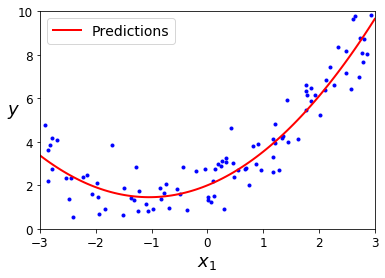

In [16]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) #Generamos 100 puntos equiespaciados de -3 a 3 y usamos
#reshape para convertirlo en una matriz columna
X_new_poly = poly_features.transform(X_new) #Generamos la matriz tranformada
y_new = lin_reg.predict(X_new_poly) #Generamos el vector y de predicciones


plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()



Hacemos lo mismo pero con un Pipeline: La clase Pipeline de Scikit-learn está diseñada como una forma manejable de aplicar una serie de transformaciones de datos seguidas por la aplicación de un estimador .

https://scikit-learn.org/stable/modules/compose.html#pipeline

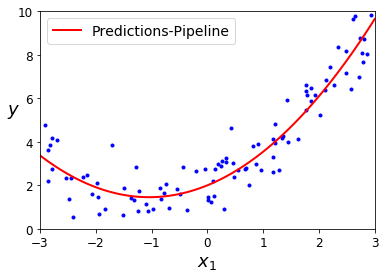

(array([[0.        , 1.04630034, 0.5015459 ]]), array([1.99958228]))

In [17]:
from sklearn.pipeline import Pipeline

poly_features = PolynomialFeatures(degree=2, include_bias=True)
lin_reg = LinearRegression()
    
polynomial_regression = Pipeline([ 
            ("poly_features", poly_features),
            ("lin_reg", lin_reg),
        ])

polynomial_regression.fit(X, y)
y_new = polynomial_regression.predict(X_new)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions-Pipeline")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()
polynomial_regression['lin_reg'].coef_, polynomial_regression['lin_reg'].intercept_

Vamos a hacer un ejemplo con polinomios de distintos grados para ver como ocurre overfitting

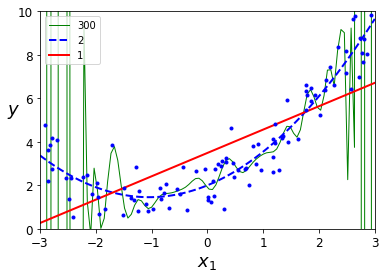

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler() 
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline([ 
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler), # subtracts the mean from each features and then scale to unit variance. 
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Para ver si nuestro modelo es demasiado simple (underfitting) o demasiado complejo (overfitting) se pueden usar las learning curves

Primero vemos qué pasa con un modelo lineal en vez de polinomial, y ocurre underfitting: vemos las learning curves que se generan

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) #Entrenamos modelo con m primeros elementos de X_train y sus parejas y_train
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)

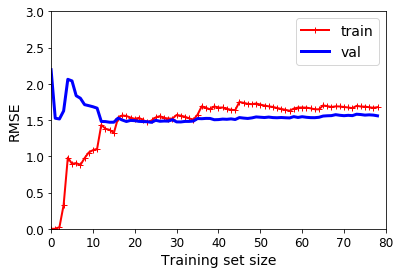

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.show()             

Ahora con un modelo polinomial de grado 10, ocurrirá overfitting: cuantos más datos tengamos para entrenar el modelo más se acercarán ambas curvas, y el validation error será igual que el training error (y ya no pasará overfitting, que ocurre cuando nuestro modelo trabaja muy bien con los datos entrenados pero muy mal con los de validación)

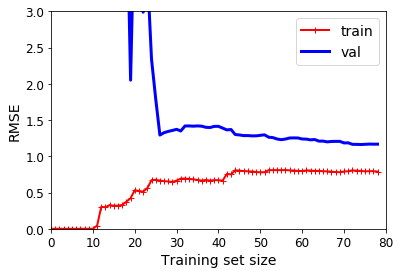

In [21]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])             
plt.show() 

# Modelos Lineales regularizados

### Ridge Regression

Generamos el dataset, que es de la forma:
    $y = 1 + 1.5x_{1} + \frac{RuidoGaussiano(0,1)}{1.5} = 1 + 1.5x_{1} + RuidoGaussiano(0,\frac{2}{3})$

In [22]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

X_new = np.linspace(0, 3, 100).reshape(100, 1)

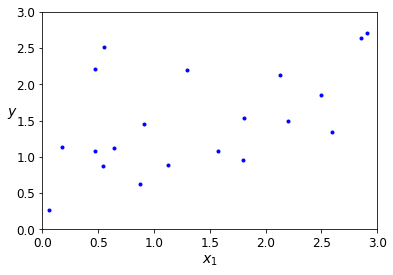

In [23]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.axis([0, 3, 0, 3])
plt.show()

Aplicando el modelo lineal, tenemos que hallar los parámetros que en este caso son w0 y w1:
$$y_{i}=w_{0}+w_{1}\cdot x_{i1}$$ 
con (en closed form):
$$w_{RR}= (\alpha I +X^{T} X)^{-1}X^{T}y$$ 
siendo:
$$X = \begin{bmatrix}
 1& x_{11} \\ 
 1& x_{21}\\ 
 ...& ...\\ 
 1& x_{100\, 1}
\end{bmatrix}$$

$$y=X\cdot w$$

In [24]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]]), ridge_reg.intercept_, ridge_reg.coef_

(array([[1.55071465]]), array([1.00650911]), array([[0.36280369]]))

In [25]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]]), ridge_reg.intercept_, ridge_reg.coef_

(array([[1.5507201]]), array([1.00645006]), array([[0.3628467]]))

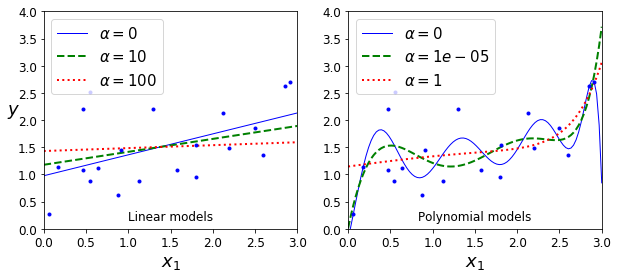

In [26]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) 
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('Linear models', y=0.01)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.title('Polynomial models', y=0.01)


plt.show()



Para elegir el mejor valor de alfa se puede usar Cross-Validation, más específicamente k-folds

In [27]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

In [28]:
alphas=[1, 10, 100]

regressor = RidgeCV(alphas, store_cv_values=True) #RidgeCV hace cross validation de manera automática para elegir 
#el mejor alfa
regressor.fit(X, y)
cv_mse = np.mean(regressor.cv_values_, axis=0)

print(cv_mse)
print(regressor.alpha_)


[[0.42774846 0.43597013 0.49087458]]
1


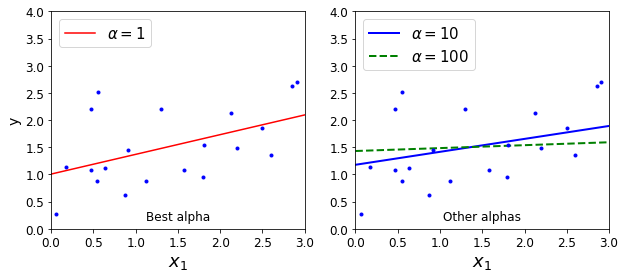

In [29]:
predict_y = regressor.predict(X_new)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(X, y, "b.", linewidth=3)
plt.plot(X_new, predict_y, color='red', label=r"$\alpha = {}$".format(regressor.alpha_))
plt.ylabel('y')
plt.xlabel("$x_1$", fontsize=18)
plt.axis([0, 3, 0, 4])
plt.legend(loc="upper left", fontsize=15)
plt.title('Best alpha', y=0.01)

plt.subplot(122)
alphas2 = alphas[:]
alphas2.remove(regressor.alpha_)
plot_model(Ridge, polynomial=False, alphas=alphas2, random_state=42)
plt.title('Other alphas', y=0.01)
plt.show()

### Lasso Regression

/home/alberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
/home/alberto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/alberto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.446263664309721, tolerance: 0.0009294783355207351
  positive)
/home/alberto/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:356: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/h

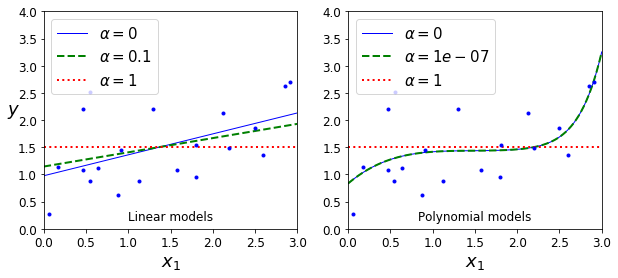

In [30]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title('Linear models', y=0.01)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.title('Polynomial models', y=0.01)
plt.show()

# Anexo

When do we standardize our data? https://builtin.com/data-science/when-and-why-standardize-your-data

Hacemos estandarización cuando se produce multicolinear: https://blog.minitab.com/blog/adventures-in-statistics-2/when-is-it-crucial-to-standardize-the-variables-in-a-regression-model

In [31]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

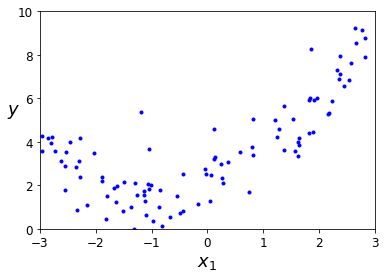

In [32]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

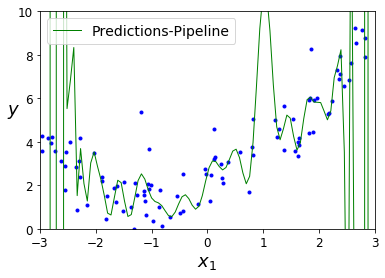

In [33]:
from sklearn.pipeline import Pipeline

poly_features = PolynomialFeatures(degree=300, include_bias=True)
lin_reg = LinearRegression()
    
polynomial_regression = Pipeline([ 
            ("poly_features", poly_features),
            ("std",std_scaler),
            ("lin_reg", lin_reg),
        ])

polynomial_regression.fit(X, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
y_new = polynomial_regression.predict(X_new)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "g-", linewidth=1, label="Predictions-Pipeline")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()
